In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Large Random Samples

In [5]:
united = Table.read_table('data/united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


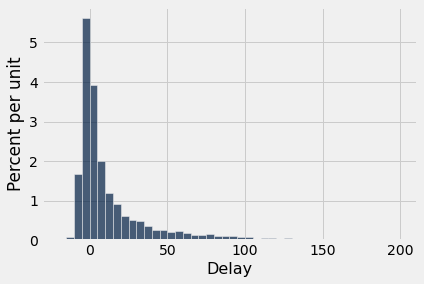

In [6]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

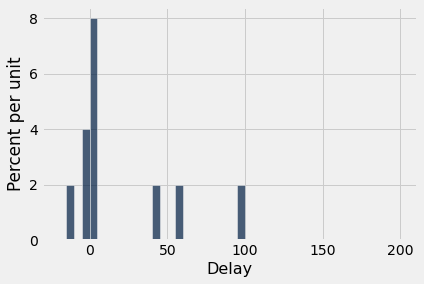

In [7]:
# (Sample) Empirical Distribution
united.sample(10).hist('Delay', bins = united_bins)

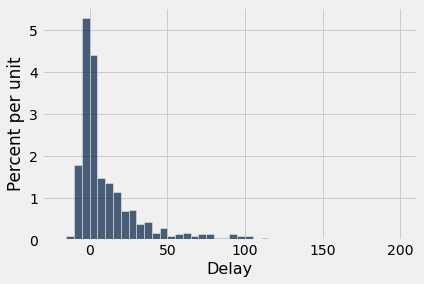

In [8]:
# (Sample) Empirical Distribution - collection of values from our sample
# as we increase our sample size
# our sample becomes a better and better representation of our population
united.sample(1000).hist('Delay', bins = united_bins)

## Statistics

In [9]:
# (Population) Parameter
np.median(united.column('Delay'))
# median flight delay of our population is 2 minutes

2.0

In [10]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))
# median flight delay of our sample of size 10 is -0.5 minutes

-0.5

In [11]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))
# median flight delay of our sample of size 100 is 1.5 minutes
# our sample statistic gets a little better
# in estimating our population parameter, which is 2.0

1.5

### Probability & Empirical Distributions of a Statistic

In [23]:
# now that we've sampled our united table above
# and take a sample statistic: median of the sample

# let's now define a function, called sample_median
# which takes in one argument, size
# that allows you to take a sample of the united table
# and find a sample statistic: median of the sample

def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [15]:
# one sample of size 10
# median of this sample
# sample statistic

sample_median(10)

2.5

In [18]:
# another sample of size 10
# median of this sample
# sample statistic

sample_median(10)

3.0

In [19]:
num_simulations = 2000

In [22]:
# can you generate 2000 samples 
# and capture all their sample statistics (medians) 
# in an array?
# sample size of 10 for each one

# initialize an empty array outside of our for loop
# to collect stuff for later
sample_medians = make_array() # empty array

for i in np.arange(num_simulations):
    one_sample_median = sample_median(10)
    sample_medians = np.append(sample_medians, one_sample_median)
    # first time i go through my for loop, i will collect one median flight delay
    # the second time i will collect a second
    # the last time i run through my for loop, will be the 2000th time
    # i will then exit out of the foor loop
    # and sample_medians should have 2000 median flight delays from 2000 samples

len(sample_medians)

2000

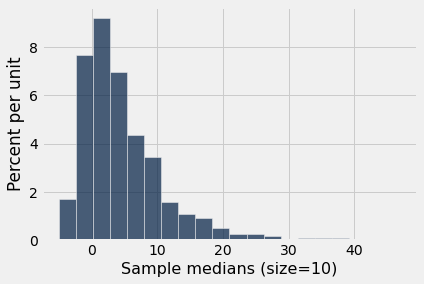

In [24]:
# add our array of median flight delays
# there should be 2000 of them in our array
# to a table
# so we can chart a histogram
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [27]:
# can you generate 2000 samples, with size 1000
# and capture all their sample statistics (medians) 
# in an array?

# initialize an emptry array
sample_medians = make_array()

for i in np.arange(num_simulations):
    one_sample_median = sample_median(1000)
    sample_medians = np.append(sample_medians, one_sample_median)
    # first time i go through my for loop, i will collect one median flight delay
    # the second time i will collect a second
    # the last time i run through my for loop, will be the 2000th time
    # i will then exit out of the foor loop
    # and sample_medians should have 2000 median flight delays from 2000 samples

len(sample_medians)



2000

In [28]:
sample_medians

array([2., 3., 2., ..., 2., 2., 3.])

In [30]:
help(Table.hist)

Help on function hist in module datascience.tables:

hist(self, *columns, overlay=True, bins=None, bin_column=None, unit=None, counts=None, group=None, rug=False, side_by_side=False, left_end=None, right_end=None, width=None, height=None, **vargs)
    Plots one histogram for each column in columns. If no column is
    specified, plot all columns. If interactive plots are enabled via ``Table#interactive_plots``,
    redirects plotting to plotly with ``Table#ihist``.
    
    Kwargs:
        overlay (bool): If True, plots 1 chart with all the histograms
            overlaid on top of each other (instead of the default behavior
            of one histogram for each column in the table). Also adds a
            legend that matches each bar color to its column.  Note that
            if the histograms are not overlaid, they are not forced to the
            same scale.
    
        bins (list or int): Lower bound for each bin in the
            histogram or number of bins. If None, bins wil

In [41]:
bin_widths = np.arange(-0.5, 5.5, 1)
Table().with_column('Sample medians (size=1K)', sample_medians).hist(bins = bin_widths)

ValueError: The column 'Sample medians (size=1K)' contains non-numerical values. A histogram cannot be drawn for this table.

#### Empirical Distributions Overlayed

In [37]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

#do the following a bunch of times, num_simulations times
for i in np.arange(num_simulations):
    #generate a sample of size 10 and capture its median
    median_10 = sample_median(10)
    # append it to the array sample_medians_10
    sample_medians_10 = np.append(sample_medians_10, median_10)
    #generate a sample of size 100 and capture its median
    median_100 = sample_median(100)
    # append it to the array sample_medians_100
    sample_medians_100 = np.append(sample_medians_100,median_100)
    #generate a sample of size 1000 and capture its median
    median_1000 = sample_median(1000)
    # append it to the array sample_medians_1000
    sample_medians_1000 = np.append(sample_medians_1000, median_1000)

    
#sample_medians_10 should have 2000 median flight delays in it
#sample_medians_100 should have 2000 median flight delays in it
#sample_medians_1000 should have 2000 median flight delays in it

# do we capture our population parameter?
# how well do we capture our population paremter?
# remember our bull's eye is median flight delay of 2 minutes

In [38]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

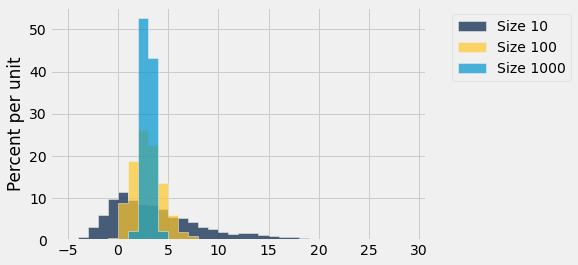

In [39]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [ ]:
population_proportions = make_array(.26, .74)
population_proportions

In [ ]:
sample_proportions(100, population_proportions)

In [ ]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [ ]:
panel_proportion()

In [ ]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

In [ ]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

## Mendel and Pea Flowers ##

In [ ]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

In [ ]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

In [ ]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [ ]:
purple_flowers()

In [ ]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

In [ ]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [ ]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [ ]:
abs(observed_purples * 100 - 75)